In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

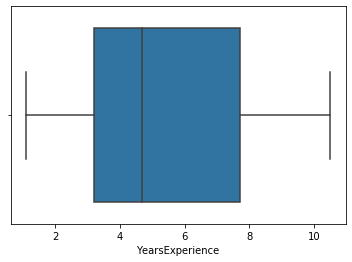

In [5]:
sns.boxplot(df['YearsExperience'])

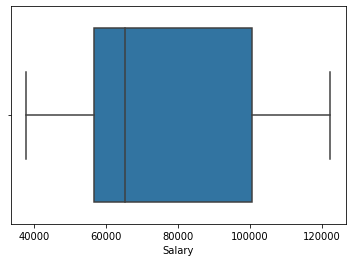

In [6]:
sns.boxplot(df['Salary'])

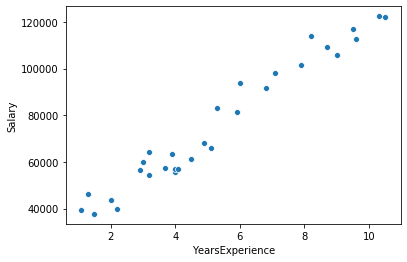

In [7]:
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = df)

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


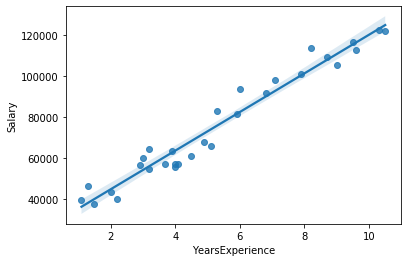

In [9]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = df)

In [10]:
# Independent Variable
x = df[['YearsExperience']]

In [11]:
# Dependent Variable
y = df[['Salary']]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.7,random_state = 100)

In [14]:
x_train

,YearsExperience
17,5.3
22,7.9
11,4.0
4,2.2
29,10.5
0,1.1
1,1.3
18,5.9
14,4.5
19,6.0


In [15]:
from sklearn.linear_model import LinearRegression

# Created an instance of 'Linear Regression' class
model = LinearRegression()

In [16]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

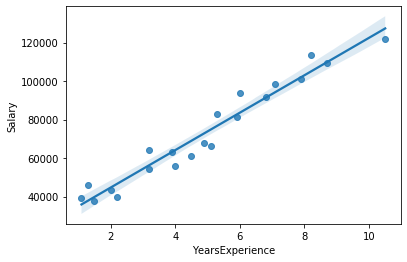

In [17]:
sns.regplot(x_train['YearsExperience'], y_train['Salary'])

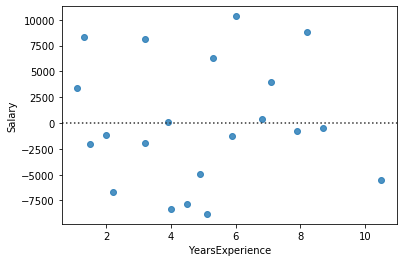

In [18]:
sns.residplot(x_train['YearsExperience'], y_train['Salary'])
# It shows the regression line between the two variables and then shows the errors

In [19]:
model.intercept_

array([25202.88778615])

In [20]:
model.coef_

array([[9731.20383825]])

In [21]:
# Prediction model

# y = 25202.88778615 + 9731.20383825 * x

# Predicted Salary = 25202.88778615 + 9731.20383825 * (Years of Experience)

In [22]:
y_pred = model.predict(x_test)
y_pred

array([[ 61208.34198766],
       [117649.32424949],
       [125434.28732008],
       [ 65100.82352296],
       [ 53423.37891707],
       [ 64127.70313914],
       [118622.44463331],
       [112783.72233036],
       [ 54396.49930089]])

In [23]:
x_test

,YearsExperience
9,3.7
26,9.5
28,10.3
13,4.1
5,2.9
12,4.0
27,9.6
25,9.0
6,3.0


In [24]:
25202.88778615 + 9731.20383825 * (5.2)

75805.14774505

# Error or Residual

In [25]:
y_test-y_pred

,Salary
9,-4019.341988
26,-680.324249
28,-3043.287320
13,-8019.823523
5,3218.621083
12,-7170.703139
27,-5987.444633
25,-7201.722330
6,5753.500699


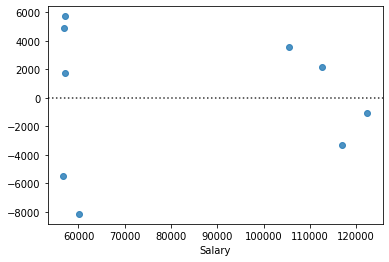

In [26]:
sns.residplot(y_test, y_pred)

In [27]:
df_error = pd.DataFrame(y_test-y_pred)
df_error.sort_index(inplace = True)
df_error

,Salary
5,3218.621083
6,5753.500699
9,-4019.341988
12,-7170.703139
13,-8019.823523
25,-7201.722330
26,-680.324249
27,-5987.444633
28,-3043.287320


In [28]:
from sklearn import metrics
from math import sqrt

In [29]:
r_square = metrics.r2_score(y_test,y_pred)
# 

In [30]:
print(r_square)

0.9627668685473267


In [31]:
mse = metrics.mean_squared_error(y_test,y_pred)
mse
# Mean_squared_error(mse) --- least is best

30310299.043402452

In [32]:
rmse = sqrt(mse)
rmse
# Rmse least is best

5505.479002176146

In [33]:
np.sqrt(mse)

5505.479002176146